# Recommendation tutorial

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 분석 데이터 준비: game log 데이터

In [3]:
dau= pd.read_csv('section4-dau.csv')
user=pd.read_csv('section4-user_info.csv')

### 연관성분석용의 가상 데이터셋 만들기

In [65]:
#gda_item(1~5)를 가지는 변수
s = np.random.uniform(1,200,170360)
s1 = s.tolist() 
s1=np.log(s1)
gda_item=list(np.int_(s1))
gda_item=list(map(lambda x:x+1,gda_item))

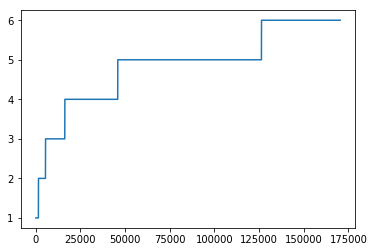

In [66]:
#gda_item 오름차순 정렬 이후 시각화
gda_item.sort()
plt.plot(gda_item)

In [63]:
# dau데이터에 gda_item 추가
gda_item= pd.DataFrame(gda_item) 
dau["item_id"]=gda_item

In [49]:
# 중복된 user_id 제거
dau01=dau[["user_id","item_id"]]
dau02=dau01.drop_duplicates()

### 가상의 슈퍼마켓 상품대분류 명칭 부여

In [83]:
#item_nm 과 item_id 연결
items_nms=['주류','위생용품','세제','즉석밥','라면','음료수']
num=[1,2,3,4,5,6]
item_mstr = {"item_id":num,"item_nm":items_nms }
item_mstr=pd.DataFrame(item_mstr)
display(pd.DataFrame(item_mstr))

,item_id,item_nm
0,1,주류
1,2,위생용품
2,3,세제
3,4,즉석밥
4,5,라면
5,6,음료수


In [86]:
# merge
dau02=pd.merge(dau02, item_mstr)
dau02.head()

,user_id,item_id,item_nm
0,33754,5,라면
1,117,5,라면
2,6605,5,라면
3,123,5,라면
4,31687,5,라면


In [143]:
d03=dau02[['user_id','item_nm']]
d03.head()

,user_id,item_nm
0,33754,라면
1,117,라면
2,6605,라면
3,123,라면
4,31687,라면


## 간단한 분포확인 - EDA

In [108]:
#한글 폰트 사용
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

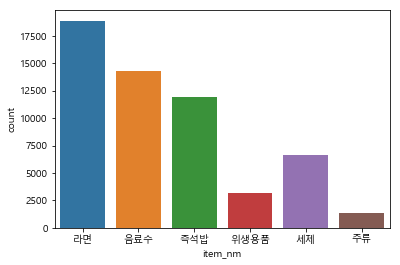

In [123]:
sns.countplot(x="item_nm", data=d03)

In [175]:
#전체
grouped = d03.groupby('item_nm')
item_group_count=grouped.count()
item_group_count_ratio=item_group_count/len(d03)
item_group_count_ratio
dau04=pd.merge(d03, item_group_count_ratio)
dau04.head()

C:\Users\kiwon\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:946: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


,user_id,item_nm


In [114]:
import numpy as np
import matplotlib.pyplot as plt
/len(d03)
# y_value = d03
# x_name=('1', '2', '3', '4', '5','6', '7', '8', '9', '10', '11', '12')
# n_groups = len(x_name)
# index = np.arange(n_groups)

# plt.bar(index, y1_value, tick_label=x_name, align='center')

# plt.xlabel('month')
# plt.ylabel('average rainfall (mm)')
# plt.title('Weather Bar Chart')
# plt.xlim( -1, n_groups)
# plt.ylim( 0, 400)plt.show()

56216